# Lab 2 Report
## Mark Ambrose 1624498
## April/May 2021

## 1. Introduction
A classical computer operates in a binary manner; it either sends/receives an ON or OFF state.Binary additions forms the fundamental building blocks of computing; it allows users to encode or manipulate data. The most basic form of binary manipulation is binary addition in the form of Full-Adders [5]. Quantum Full-Adder can be encoded as a fundamental building block of quantum circuits.

Quantum Computers are not constrained to being binary as qubits can contain an arbitrary superposition state anywhere between 0 and 1; allowing a qubit to potentially contain more useful information than a classical bit [7]. This makes quantum circuit more suited for specific niches such as the Deutsch-Jozsa algorithm. A major useful property of quantum computers is its reversibility which can become a cost saving as well as efficient alternative to classical computers [2].

A quantum Full-Adder is created using five qubits that can add two one-it numbers. Three parallel Full-Adders are used to add two 3-qubit numbers. This addition is first simulated under ideal conditions then executed on real hardware. Two 5-qubit numbers are also computed under simulation. The results are contrasted between simulation and real results. Interest will include the effects of scaling this algorithm and the resources required to do so. Furthermore, the effect of reversing the circuit is analyzed

## 2. Background
### 2.1 Noise in a Quantum Computers
Quantum computations contain quantum decoherence or noise which occurs when qubits lose information to the environment over time [4]. Whenever a qubit is measured, or a gate performed on it; noise occurs. Since qubits have multiple possible state, the number of errors can grow exponentially with the linear number of qubits. Therefore, there is a limit to the number of qubits used to output useful information (Fault Tolerance). This is considered when designing the Full-Adder.

### 2.2 Full-Adders
A classical Adder contain three inputs; two one-bit numbers to add and a carry in. Two outputs exist, the summer which is the result of adding the two-bits and a carry out, the result of needing an extra bit (when adding 1+1). The carry out can be fed into the Next Full-Adder as the carry in effectively creating N-bit Parallel Adders. This is the design to which the circuits will adhere to.

### 2.3 Measuring the Qubits
When a quantum state is not observed it can be in any superposition state. Once that state is observed(measured) the state collapses into one of two binary states. Therefore, measurements in the circuit will be conducted atthe last stage of the circuit. If measurements were conducted after each successive Full-Adder (whilst the circuit is operating), the qubits would collapse into one of two binary states. This would not be utilizing the quantum capabilities of the circuit and effectively would treat the circuit as a classical Full-Adder.

Only the Sum (S) of each Full-Adder needs to be measured as it is the output of each single qubit addition. The last carry in needs to be measured as well to display if the most significant qubit is a 1 or 0. Therefore, N+1 qubit are measured and stored in N+1 classical bits.

## 3. Full-Adder Class Design
### 3.1 Summer and Carry Design

$q_0, q_1, q_2$ are the input. $q_3 and q_4$ are the sum and $C_{out}$ respectively. The Summer and carry are created by the 'summer' and 'carry' function respectively. They are compiled in the 'FullAdder' function.

### 3.2 ConcurrentAdders Function
This function builds the required N Full-Adders to add two N-bit numbers. The following sums up the function:
   - Create the circuit.
   - Apply required X-Gates as the input to the circuit from given two binary numbers.
       - X-gates convert the initial state of zero to a one.
   - Append the Full-Adder to the circuit.
   - Add measurements.
   - Run the circuit using 'SimulationType' function. 
       - Input of True will run Ideal simulation.
       - Input of False will run on a real quantum computer. 
   
### 3.3 Confirming Results

Histograms are plotted for each addition which displays the output of the N-bit parallel Full-Adders.
For example, a 3-qubit addition will output the string of qubits containing $C_{out}S_2S_1S_0$. The data from Histograms was extracted and analyzed to confirm the success of the design.
 
## 4. Results
### 4.1 Ideal 3 and 5 Qubit Addition
*Table 1* displays the results found using two three qubit addition under ideal simulation. A random selection of 3-qubit numbers were chosen for *Table 1* due to hardware constraints when using real hardware. Time is required to run the circuit on a select quantum computer due to a queue, therefore not every possible 3-qubit addition could be performed. The values of A and B were swapped after every simulation to test if the results were the same when inputted in reverse.

It was found that under ideal simulation, the results are 100% accurate for 3-qubit and 5-qubit addition. One thousand shots or samples were conducted when simulating results for consistency.5-qubit addition was found to be accurate for all simulations and is not tabulated.

 |A Decimal|B Decimal|  A  |  B  | Result | Result Decimel |
 |   :-:   |   :-:   | :-: | :-: |   :-:  |      :-:       |
 |    0    |    0    | 000 | 000 |   000  |       0        |
 |    1    |    0    | 001 | 000 |   001  |       1        |
 |    0    |    1    | 000 | 001 |   001  |       1        |
 |    4    |    5    | 100 | 101 |  1001  |       9        |
 |    5    |    4    | 101 | 100 |  1001  |       9        |
 |    4    |    6    | 100 | 110 |  1010  |       10       |
 |    6    |    4    | 110 | 100 |  1010  |       10       |
 
*Table 1*:Results of Ideal 3-Qubit Addition using 1000 shots.

Running the circuit on real hardware resulted in obtaining varying probabilities of different qubit states. he desired state almost never was the highest probability. The highest probability tended towards only receiving zeros.


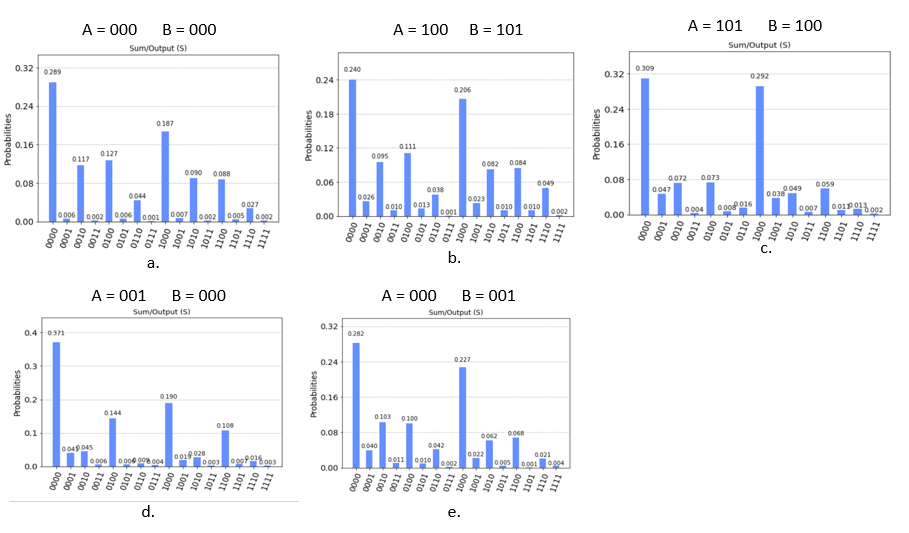

In [5]:
from IPython.display import Image
# Load image from local storage
Image(filename = "/Users/marks/OneDrive/Eng-Elec Wits 2021/Semester 1/ELEN4022 - Full Stack Quantum Computing/Lab 2/Capture.png", width = 400, height = 300)


*Figure 1*: Results of Real 3-Qubit Addition using 1000 shots for five different inputs.

### 4.3 Reversing 3 Qubit Full-Adder
By using Qiskits 'reverse_ops()' function, the gates are applied in reverse to the circuit effectively running the circuit backwards. The histogram plotted of the result yielded all the qubits in the state of zeros which is the initial conditions. 


## 5. Alternative Design
By keeping the number of qubits as low as possible, some noise can be mitigated. Another Full-Adder design was simulated that used only one Full-Adder to add N-qubits. It performed by using feedback; the output carry of the Full-Adder was fed back into the input carry of the same Full-Adder. This is in a similar manner of N-bit Parallel Full-Adders. The Full-Adder was then looped N times for N qubits. The output data for each full adder was extracted and used to determine which if the carry-in of the Full-Adder required an X-gate applied to create a state of 1 or not. 

However, this design was only possible for ideal circuits as it only considered one output of the Full-Adder. Real simulation yielded probabilities of qubits rather than just one qubit with a probability of 1. This design could not be simulated for real hardware. It is included in the exercise notebook at the end. 

When running this design on simulation, ideal conditions, it correctly performed 100$\%$ of the time. This design took in two decimal numbers of any value, converted them to binary and then added them. The output binary was displayed and then converted back to decimal to check the accuracy. 

This design did enlighten an important aspect of data handling in Quantum Computing. In perfect simulations, the output is binary (100$\%$ of one output) therefore data output can be handled the same for classical computers. However, under real conditions there are multiple outputs each with their own probabilities. Therefore, it becomes blurred as to which output to select and how to handle them. There is no clear solution to what data to use and how to use it in terms of its probabilities.

## 5. Analysis
### 5.1 Efficiency of Results
Figure 2 displays how a useful result from Full-Adder addition is not straightforward. No qubit has more than 40% probability of being in each state. Adding $000$ and $000$ gives the correct output of $000$ at 28.9% probability where the next highest probability is 18.7%. Therefore, if an error tolerance of 10% is chosen, the correct result can be derived from the qubit from the highest probability.

However, this is not the case for the rest of the results. Adding 4 and 5 should yield a binary result of 1001. The probability of receiving 1001 from *Figure 2b and 2c* is only 2.3% and 3.8%. This probability is far too low to yield any meaningful result. Therefore, choosing the required qubit results from probabilities is not accurate.

Quantum Full-Adders operate successfully under ideal conditions but when conditions are non-ideal the results are not usable. Quantum computers are better suited for niche operations such as the Duestch-Jozsa algorithms rather than trying to replace existing and functional classical operations. 

Error-correction for noise in running the circuit on real hardware should be implemented to obtain accurate and thus useful results. Quantum Error Correction (QEC) is a possible algorithm to fix errors [9]. However, noise cannot account for getting what Figure 1 displays as essentially random answers. Quantum algorithms are best for sorting through a vast number of potential outputs geared towards a desired outcome. The Deutsch-Jozsa is an algorithm that is used to determine if an input binary string is balanced or constant. This algorithm must sift through $s^{n+1}$ outputs, worse case, in order to determine if the input is balanced or constant. As quantum computers are well suited for situations requiring a large values to be simulated, The Deustch-Jozsa algorithm is one such case where quantum computers outperform classical computers. 

The carry of a classical Full-Adder has a time complexity of $\log{n}$ where n is the number of bits. The carry bit has time complexity of n as need to perform a bitwide AND operation between n+1 input bits. Therefore, a classical Full-Adder has a complexity of $\mathcal{O}(\log{n})$. The Quantum Full-Adder operates under the same principle of carry ins and outs. The Quantum Full-Adder also applies a quantum equaivalent of the binary XOR gate, the CNOT gate, in adding qubits. The time complexity of the Quantum Full-Adder is found to be  $\mathcal{O}(\log{n})$ whch is the same as classical Full-Adders. Hence, Quantum Full-Adders are not more efficient or faster than classical Full-Adders.

### 5.2 Scaling Issue
Scaling is also an issue. Since, three qubit addition requires 12 qubits the ibmq_16_melbourne quantum computer had to be used as it offers up to 15 qubits. Scaling this Full-Adder to add many more qubits is not currently possible. The largest quantum computer currently only has 72 qubit [1] which limits the number of qubits that can be added.

There is not enough resources to accurately implement Full-Adders at a scale for any useful computation as a 72 qubits can at most add around 18 qubit numbers using the Full-Adder implemented here. Furthermore, since simulating on real hardware yields unusable, wrong results, even if more qubits existed it would still not make a quantum Full-Adder useful. Errors grow with the number of qubits, therefore using more qubits would yield less reliable results. Due to the No-cloning Theorem, qubits cannot be copied from one to the other. This disables redundancy error correction techniques [6] which can be an explanation for why noise still exists in quantum computers.

### 5.2 Reversible Full-Adders
Furthermore, classical Full-Adders are not reversible. Adding two numbers cannot be undone which means a loss of information. However, gate operations in quantum circuits are Hermitian which means that these gates function are their own inverse [2]. Therefore, quantum Full-Adder circuits can run in reverse. With reversible operations, one can process data without losing that data's earlier states. This is a more energy efficient method of computing offering a more efficient alternative to classical computers [8]. The only drawback is the noise existing in quantum computing that makes the data unusable.  

## 6. Conclusion and Recommendation
Further improvements can be implemented by reducing the number of qubits to implement a Full-Adder. It is possible to create a four qubit Full-Adder by a smart reuse of qubits [10]. This would help in the scaling issue as less resources would be required to implement the circuit. Furthermore, quantum computers work best when geared towards a desired outcome under a large dataset. Thererfore, to improve thhe Quantum Full-Adder, it would require operating this design under a vast array of additions where the desired binary outcome is prioritised. 

A quantum Full-Adder was created and implemented. It was found to work successfully under ideal conditions, but under real conditions due to noise it was a failure. Three and five qubit numbers could be added, however larger qubit addition would require access to a quantum computer of more than 15 qubits. The circuit was reversible outputting the initial qubit states when done so. This is a promising feature for more efficient power usage of computers. 

## 7. References
[1] 	M. Dyakonov, "The Case Against Quantum Computing," 15 November 2018. [Online]. Available:             https://spectrum.ieee.org/computing/hardware/the-case-against-quantum-computing. [Accessed           April 2021].

[2] 	M. P. Frank, "The Future of Computing Depends on Making It Reversible," 25 August 2017. [Online]. Available: .https://spectrum.ieee.org/computing/hardware/the-future-of-computing-depends-on-making-it-reversible. [Accessed April 2021].

[3] 	Corporate Finance Institute, "What is Moore’s Law?," 2021. [Online]. Available: https://corporatefinanceinstitute.com/resources/knowledge/other/moores-law/.

[4] 	T. Greene, "Understanding quantum computers: The noise problem," 25 October 2018. [Online]. Available: https://thenextweb.com/news/understanding-quantum-computers-the-noise-problem. [Accessed April 2021].

[5] 	A. Heddings, "What is Binary, and Why Do Computers Use It?," 1 October 2018. [Online]. Available: https://www.howtogeek.com/367621/what-is-binary-and-why-do-computers-use-it/. [Accessed April 2021].

[6] 	S. Kak, "A quantum computing future is unlikely, due to random hardware errors," 3 December 2019. [Online]. Available: https://theconversation.com/a-quantum-computing-future-is-unlikely-due-to-random-hardware-errors-126503. [Accessed April 2021].

[7] 	C. Orzel, "What Sorts Of Problems Are Quantum Computers Good For?," 17 April 2017. [Online]. Available: https://www.forbes.com/sites/chadorzel/2017/04/17/what-sorts-of-problems-are-quantum-computers-good-for/?sh=1d842d21547a. [Accessed April 2021].

[8] 	A. Hoover, "Are “reversible” computers more energy efficient, faster?," 19 January 2004. [Online]. [Accessed April 2021].

[9] 	M. J. Biercuk, "Quantum Computer Error Correction Is Getting Practical," 25 February 2021. [Online]. Available: https://spectrum.ieee.org/tech-talk/computing/hardware/quantum-computer-error-correction-is-getting-practical. [Accessed April 2021].

[10]    Quantum Inspire, "Code example: Quantum full adder," 2021. [Online]. Available: https://www.quantum-inspire.com/kbase/full-adder/. [Accessed April 2021].


![](images/Capture.png)
![](images/mario.png)